## Introduction

Data management platform (DMP) helps publishers manage audiences. They ensure that only well targeted ads are displayed to the users. As the implementation of technique using data is emerged, DMPs have found insights from Ad Click Prediction then helped publishers for advertising yield management, which increases ad engagement, hence maximizing publisher’s yield and revenue.

CTR , which stands for “Click-Through Rate”, is typically used as one of the classic performance marketing metrics. It is a calculation of how many people clicked on an ad (clicks) divided by the number of times the ad was shown (impressions). But, CTR is much more than just a metric. In fact because advertisers typically pay publishers for every ad click, CTR affects the bottom line for both sides in the advertising partnership.

Publishers monetize their sites or blogs, by showing ads over their inventory or “ad-spot” or placements. It tries to monetize sites by implementing contextually relevant text ads. Monetization of the site is usually done by PPC, payment per each click on a text banner. The DMP’s role is to optimize the publisher’s Yield Management Efforts.

To satisfy publisher, DMP requires optimization of Yield Management. Predictive Modeling on Ad Click will help for the optimization since it gives an insight whether the ad is likely to be clicked or not. 

## Goal & Method

The goal of the projet is an optimization of Yield Management through prediction of Ad clicks. Through Logistic Regression Model, I will predict who is likely going to click on the Ad on a website based on the features of a user. The references I will use for the project are following: 

1) Yield Optimization of Display Advertising with Ad Exchange
http://www.columbia.edu/~srb2155/papers/adx-alloc-ms.pdf

* It helps me to consider the publisher's problems and to understand the Display Ad and Network Revenue Management problems as well
* It gives me a better understanding of Yield Management and Publisher’s decision tree for a new impression is useful


2) Yield Management: A Starter Guide for Publishers | 2019 Edition
https://www.adpushup.com/blog/yield-management-publishers/

* It provides a stage-by-stage guide, which helps me to understand how to optimize of Yield Management
* It gives me an idea that what kinds of challenges the publishers would face


## Data

The dataset is from Kaggle and there are total 10 futures in the dataset. The futures are following: 
    1. Daily Time Spent on a Site: Time spent by the user on a site in minutes
    2. Age: Customer's age in terms of years
    3. Area Income: Average income of geographical area of consumer
    4. Daily Internet Usage: Avgerage minutes in a day consumer is on the internet
    5. Ad Topic Line: Headline of the advertisement
    6. City: City where the consumer lives
    7. Male: Whether or not a consumer was male
    8. Country: Country of the consumer
    9. Timestamp: Time at which user clicked on an Ad or the closed window
    10. Clicked on Ad: 0 or 1 is indicated clicking on an Ad.

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [11]:
# Reading the file 
df = pd.read_csv('/Users/user/Desktop/Capstone Summer 19/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [12]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [14]:
#check the missing vlaues for each column 
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [15]:
#Correlation analysis
co = df.corr()
co['Clicked on Ad'].sort_values(ascending = False)

Clicked on Ad               1.000000
Age                         0.492531
Male                       -0.038027
Area Income                -0.476255
Daily Time Spent on Site   -0.748117
Daily Internet Usage       -0.786539
Name: Clicked on Ad, dtype: float64

In [22]:
# create a set of dummy variables 
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [23]:
# split the dataframe
dfs = np.split(df, [1], axis=1)

X, y = dfs[1], dfs[0]

In [26]:
# create a new dataframe called result
# column_list = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Ad Topic Line", "City", "gender", "Country", "Timestamp",
  #             "Clicked on Ad"]

column_list = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Ad Topic Line", "City", "gender", "Country", "Timestamp"]
result = pd.DataFrame(columns=column_list)

In [27]:
# use a ExtraTreesClassifier
# put our data into clf then extract importance, therefore we can find importance of each feature

clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

result.loc['Classifier_importances',:] = importances

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [28]:
# create a set of dummy variables 
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [29]:
# split the dataframe
dfs = np.split(df, [1], axis=1)

X, y = dfs[1], dfs[0]

In [30]:
# use a ExtraTreesClassifier
# put our data into clf then extract importance, therefore we can find importance of each feature

clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

result.loc['Classifier_importances',:] = importances

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [31]:
importances

array([0.13150692, 0.13756698, 0.13886308, 0.13827871, 0.13863893,
       0.03476587, 0.1345695 , 0.13615399, 0.00965602])

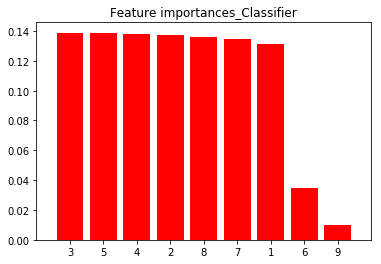

In [32]:
# use a bar graph showing the result
plt.figure()
plt.title("Feature importances_Classifier")
plt.bar(range(X.shape[1]), importances[indices], color='r')
plt.xticks(range(X.shape[1]), indices+1)
plt.xlim([-1, X.shape[1]])
plt.show()